In [1]:
import matplotlib.pyplot as plt  # matplotlib 설치시 혹은 터미널 시작시, 1번과 2번, 3번 명령어 입력으로 폰트깨짐 해결.(Mac 한정.)
from matplotlib import rc        # 1번
rc('font', family='AppleGothic') # 2번
plt.rcParams['axes.unicode_minus'] = False #3번

- 이제까지 검증하는 것을 살펴봤다. 
- 그래서 학습하고 검증하려면 데이터가 필요하다. 
- 학습을 하기 위해서 좋은 학습셋을 넣어줘야 하기 때문에 '전처리' 과정을 공부했었다. 

- 지도학습 
  - 분류 - 범주형(범주가 정해짐)  - ex.3개 중에 하나 맞추기
  - 회귀 - 연속형(범주가 안정해짐) - ex. 무한개 중에 하나 맞추기

- 데이터의 정확한 성능을 활용하기 위해 사용한 것이 평가지표 중 Accuracy 평가지표를 사용했었음.
- 오늘은 accuracy 외에 다른 분류에 관련된 평가지표를 확인하고자 한다. 

# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
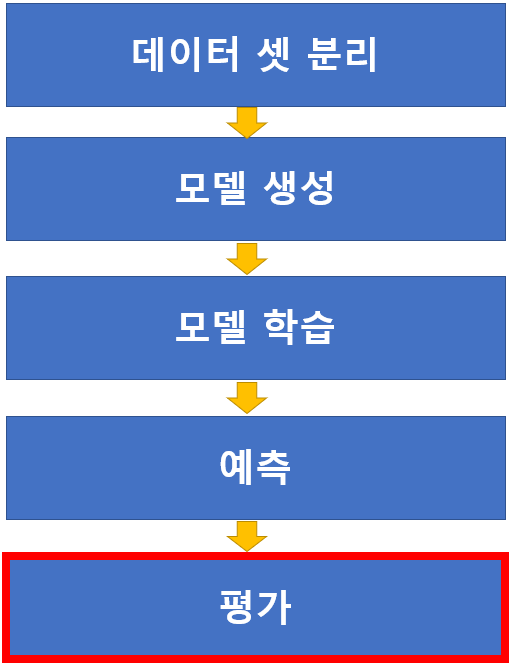

# 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

 - 2~6번까지 이진 분류에서 상당히 중요한 평가 지표들이다. 

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공  --> 이 함수 안에 분류, 회귀하는 함수들이 담겨 있다.

# 분류(Classification) 평가 지표

##  이진 분류(Binary classification)의 양성(Positive)과 음성(Negative)
- 양성(Positive): 모델이 찾으려는(추론하려는) 주 대상
- 음성(Negative): 모델이 찾으려는(추론하려는) 주 대상이 아닌 것
- 예
    - 환자 분류 
        - 양성 - 환자, 음성 - 정상인
    - 스팸메일 분류 
        - 양성 - 스팸메일, 음성 - 정상메일
    - 금융사기 모델
        - 양성 - 사기거래, 음성 - 정상거래
        

- 이진 분류 : 0은 틀리고, 1이 맞고 하는 분류 방식이다. 
- 다중 분류 : 3~4개 중에서 맞는 것 고르는 것을 다중 분류(Multy Classification)

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
-<span style="color:orange"> accuracy_score(정답, 모델예측값)</span>

### Accuracy 평가지표의 문제
- 이진 분류에서 **양성(Positive)에 대한 지표만 확인 할 수 없다.** 
- <span style="color:yellow"> 불균형 데이터의 경우 정확한 평가지표가 될 수 없다. </span> ex.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

X.shape, y.shape    #64개의 원소의 1차원 배열이 1797개의 줄을 갖고 있다. ex. [  64  ]  x 1797

((1797, 64), (1797,))

In [4]:
X[52]

array([ 0.,  0.,  3., 12., 16., 16.,  6.,  0.,  0.,  0., 10., 11.,  7.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  5.,
       11.,  8.,  9., 16.,  3.,  0.,  0.,  9., 16., 16., 16., 16.,  9.,
        0.,  0.,  1.,  4.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
       14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.])

In [5]:
y[0]

0

In [6]:
digits.feature_names   # 1797개의 줄 중에서 64개의 컬럼(feature)들의 이름 확인

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [7]:
# y(target) 값의 구성 분포
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [8]:
#X(Feature)  => pixcel 값
np.min(X),np.max(X)  #최소값은 0 최대값은 16으로 구성.

(0.0, 16.0)

In [9]:
# X,y 확인
print(y[0])   # 아래 보면 왼쪽, 오른쪽 세로를 줄로 그리며 0모영이여서 y도 영인 것이다 
X[0].reshape(8,8)  # 2차원 배열로 변경

0


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
print(y[1])
X[0].reshape(8,8) # 이건 1 모양

1


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

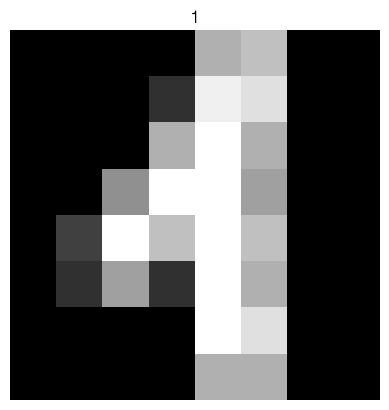

In [11]:
img_index = 200
img = X[img_index].reshape(8,8)
plt.imshow(img, cmap='gray')  #cmap: 색상 배열
plt.title(y[img_index])
plt.axis('off')   # spine 제거(edge)--> 왜 안되지???
plt.show()

### 불균형 데이터셋으로 만들기
이미지를 0 ~ 9 로 분류하는 문제를 위한 데이터셋 ===> 9와 나머지 숫자로 분류하는 데이터셋으로 변환 => 이 숫자가 9야?
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [12]:
# y에서 9가 맞는지 이진분류로 변경하는 방법

In [13]:
y[:20]  # y 20번째 줄까지 확인해줘
np.where(y ==9,1,0) #(조건, True변환값, False변환값) / (9맞어?, 응, 아니야)

array([0, 0, 0, ..., 0, 1, 0])

In [14]:
y = np.where(y ==9,1,0) 
print(np.unique(y, return_counts=True))
np.unique(y,return_counts=True)[1]/y.size

(array([0, 1]), array([1617,  180]))


array([0.89983306, 0.10016694])

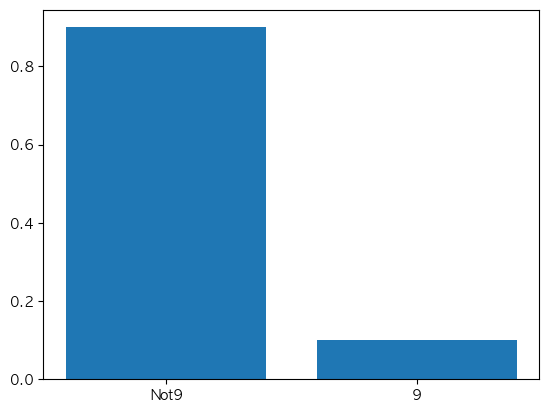

In [15]:
r = np.unique(y,return_counts=True)[1]/y.size
plt.bar([0,1],r)
plt.xticks([0,1], ['Not9','9'])
plt.show()

### 데이터셋 분할
- train/test 로 분할

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0) 
                                                           #test_size 생략->기본:0.25  

### 모델 생성 및 학습 

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score   #accuracy는 정체 정확도는 찾지만, 양성/음성 분류는 정확하지 않을수 있다.

In [18]:
# 학습
dummy_model = DummyClassifier(strategy='most_frequent')  # y의 최빈 값으로 무조건 추론=>다 0으로 예측할 것임.
dummy_model.fit(X_train, y_train)

# 정확도 검증
pred_train = dummy_model.predict(X_train)
pred_test = dummy_model.predict(X_test)


print("train 정확도:", accuracy_score(y_train, pred_train))
print("test 정확도:", accuracy_score(y_test, pred_test))


train 정확도: 0.8997772828507795
test 정확도: 0.9


In [19]:
np.unique(pred_train), np.unique(pred_test)

(array([0]), array([0]))

아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

## 혼동 행렬(Confusion Marix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: <span style="color:orange">confusion_matrix(정답, 모델예측값)</span>
- 결과의 0번축: 실제 class, 1번 축: 예측 class

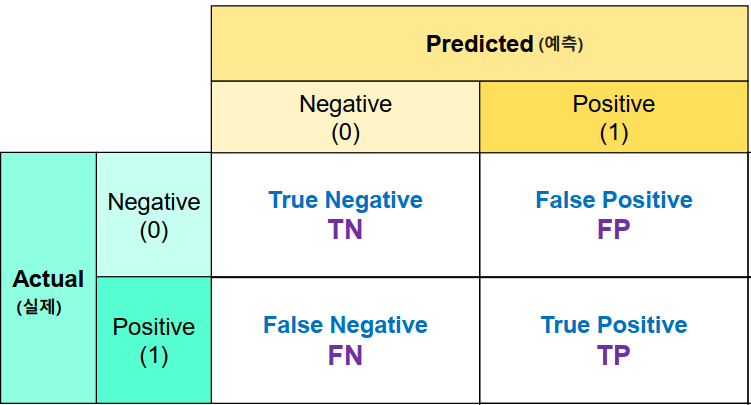

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    
### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

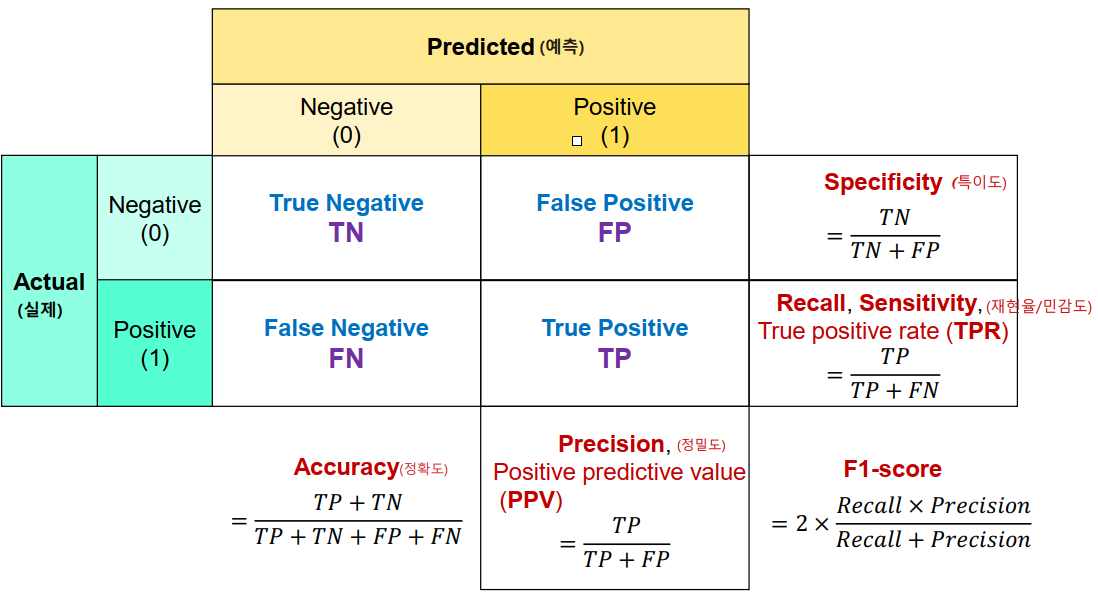

In [20]:
# - recall(재현율): positive가 얼마나 나왔는지(True positive rate)
# - precision(정밀도): positive의 예측한 값을 얼마나 잘 맞췄는지
# f1 score: 재현율과 정밀도의 평균.

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix<span style="color:orange"> (y 실제값, y 예측값) </span>,  ConfusionMatrixDisplay(Confusion matrix 시각화클래스=plot matrix)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [21]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score, 
                              precision_score, f1_score, accuracy_score)

In [22]:
# 정확도
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.8997772828507795
0.9


In [23]:
# confusion matrix
print("confusion matrix")
print("train")
print(confusion_matrix(y_train, pred_train))  #(실제값, 예측값)
print("test")
print(confusion_matrix(y_test, pred_test))

confusion matrix
train
[[1212    0]
 [ 135    0]]
test
[[405   0]
 [ 45   0]]


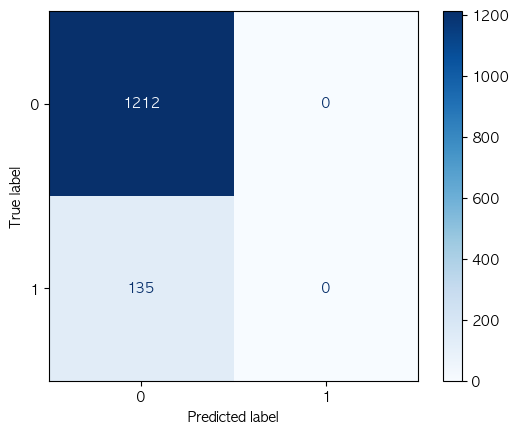

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, pred_train))  #confusion matrix 계산 결과
disp.plot(cmap="Blues")
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [25]:
recall_score(y_train, pred_train) , recall_score(y_test, pred_test)

(0.0, 0.0)

In [26]:
precision_score(y_train, pred_train), precision_score(y_test, pred_test)

/Users/chanhupark/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chanhupark/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [27]:
f1_score(y_train, pred_train), f1_score(y_test, pred_test)

(0.0, 0.0)

### classification_report()
- Accuracy와 각 class가 Positive일 때의 <span style="color:orange"> recall, precision, f1-score를 한번에 보여주는 함수 </span>

In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



/Users/chanhupark/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chanhupark/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chanhupark/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth=3)
- RandomForestClassifier 사용 (n_estimators=100, max_depth=3)

In [29]:
# 앙상블 모델 중에 하나, 여러개의 모델을 묶어서 한번에 계산하는 방식

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
%%writefile metrics.py
# # 평가 지표 -> 함수

#평가지표 저장 모듈
__version__=1.0
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score, 
                              precision_score, f1_score, accuracy_score)

def plot_confusion_matrix(y, pred, title=None):
    '''
    Confusion MAtrix 시각화 함수
    [parameter]
      y: ndarray - 정답
      pred: ndarray - 모델 예측값
      title: str - 그래프 제목
    [return]
    [exception]
    
    '''
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title:
        plt.title(title)
    plt.show()
    
    
def print_metrics_classification(y, pred, title=None):
    '''
    classficarion(분류) 결과들을 출력하는 함수
    accuracy, recall,percision, f1-score
    [parameter]
      y: ndarray - 정답
      pred: ndarray - 모델 예측값
      title: str - 그래프 제목
    [return]
    [exception]
    '''
    if title:
        print(title)
    print("정확도(accuracy):", accuracy_score(y,pred))
    print("재현율/민감도(recall): ", recall_score(y,pred))        
    print("정밀도(precision): ", precision_score(y,pred))
    print("f1-score: ", f1_score(y,pred))

Overwriting metrics.py


In [32]:
from metrics import print_metrics_classification, plot_confusion_matrix    

In [33]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rfc = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

# 학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# 검증
## 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rfc = rfc.predict(X_train)
pred_test_rfc = rfc.predict(X_test)

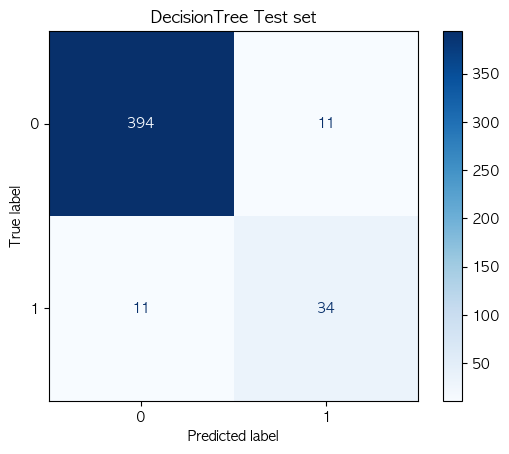

In [34]:
## confusion matrix
plot_confusion_matrix(y_test, pred_test_tree, "DecisionTree Test set")

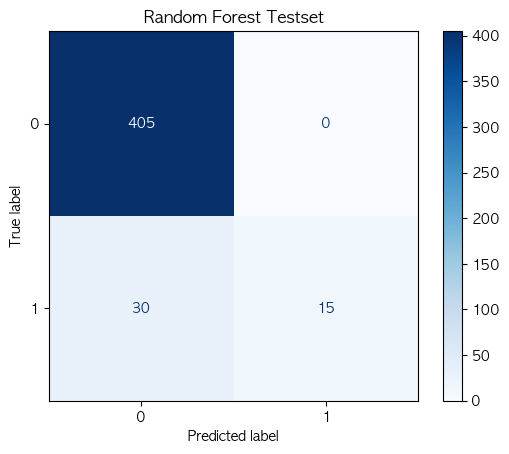

In [35]:
plot_confusion_matrix(y_test, pred_test_rfc, title="Random Forest Testset")

In [36]:
print('##########Decision Tree 검증 결과#############')
print_metrics_classification(y_train, pred_train_tree, title='Train set')
print("="*70)
print_metrics_classification(y_test, pred_test_tree, title='Test set')

##########Decision Tree 검증 결과#############
Train set
정확도(accuracy): 0.9465478841870824
재현율/민감도(recall):  0.8
정밀도(precision):  0.7058823529411765
f1-score:  0.7500000000000001
Test set
정확도(accuracy): 0.9511111111111111
재현율/민감도(recall):  0.7555555555555555
정밀도(precision):  0.7555555555555555
f1-score:  0.7555555555555555


In [37]:
print('############Random Forest 검증 결과##############')
print_metrics_classification(y_train, pred_train_rfc, title='Train set')
print('=' * 100)
print_metrics_classification(y_test, pred_test_rfc, title='Test set')

############Random Forest 검증 결과##############
Train set
정확도(accuracy): 0.9354120267260579
재현율/민감도(recall):  0.35555555555555557
정밀도(precision):  1.0
f1-score:  0.5245901639344263
Test set
정확도(accuracy): 0.9333333333333333
재현율/민감도(recall):  0.3333333333333333
정밀도(precision):  1.0
f1-score:  0.5


## 재현율과 정밀도의 관계

**이진 분류의 경우, Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우 (->정답이 1(recall)인 것을 잘 찾아야함)
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- <span style="color:orange"> FN(False Negative)를 낮추는데 촛점을 맞춘다.</span>
- 암환자 판정 모델, 보험사기적발 모델

In [38]:
# 재현율에서 성능을 높이려면 -> 후처리에서 변경하면 된다.

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- <span style="color:orange"> FP(False Positive)를 낮추는데 초점을 맞춘다.</span>
- 스팸메일 판정

## Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

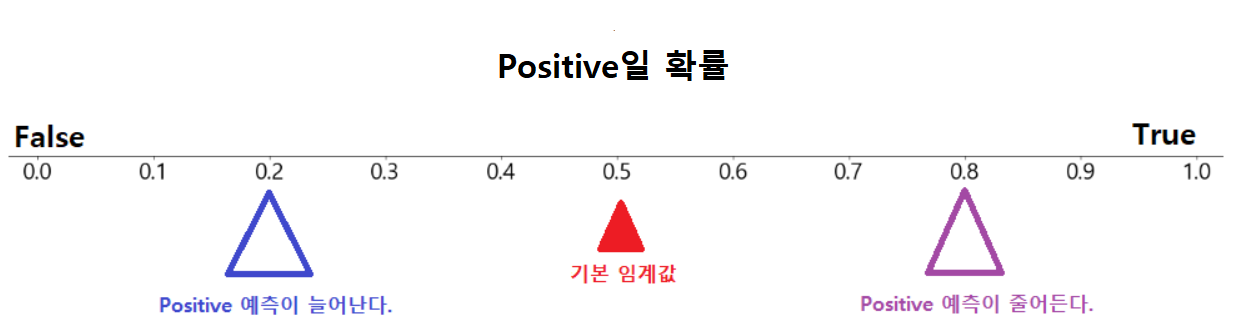

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

-- <span style="color:orange">기본 임계점을 낮추면(왼쪽으로) -> 재현율은 올라가고, 정밀도는 떨어진다. </span> 암기!!!!!!!!!
</br>-- <span style="color:orange">기본 임계점을 높이면(오른쪽으로) -> 재현율은 낮아지고, 정밀도는 올라간다. </span> 암기!!!!!!!!!

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환 / Y가 나온다. 
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환 / 모델이 예측하는 확률이 나온다. 

In [39]:
X_test.shape

(450, 64)

In [40]:
y_test[:5]

array([0, 0, 0, 0, 0])

In [41]:
tree.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [42]:
r = tree.predict_proba(X_test[:5])
print(r.shape)
r

(5, 2)


array([[0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

In [43]:
# 양성(1)의 확률만 추출
np.where(r[:, 1] > 0.01, 1, 0)

array([0, 1, 1, 1, 1])

##### 임계값 변화에 따른 recall/precision 확인
- <span style="color:orange">**precision_recall_curve(y_정답, positive_예측확률)**</span> 이용
    - 반환값: Tuple 하면 다음 세걔를 출력한다. - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [44]:
# DecisionTree , test set
from sklearn.metrics import precision_recall_curve
pos_proba_test = tree.predict_proba(X_test)[:, 1]   # [음성확률, 양성확률] => 양성확률만 추출
# print(pos_proba_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba_test)

precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [45]:
# thresholds에 1을 추가
thresholds = np.append(thresholds, 1)  # 원래 Treshold 마지막에 1이 없었다. 

In [46]:
thresholds

array([0.00826446, 0.01304348, 0.03389831, 0.04      , 0.14925373,
       0.54545455, 0.75      , 1.        ])

In [47]:
precisions

array([0.1       , 0.10757946, 0.43181818, 0.51388889, 0.56060606,
       0.75555556, 0.82352941, 1.        ])

In [48]:
recalls

array([1.        , 0.97777778, 0.84444444, 0.82222222, 0.82222222,
       0.75555556, 0.62222222, 0.        ])

In [49]:
# dataframe로 확인
import pandas as pd

prc_df = pd.DataFrame({
    "Threshold":thresholds, 
    "Recall":recalls,
    "Precisions":precisions
})
prc_df

,Threshold,Recall,Precisions
0,0.008264,1.000000,0.100000
1,0.013043,0.977778,0.107579
2,0.033898,0.844444,0.431818
3,0.040000,0.822222,0.513889
4,0.149254,0.822222,0.560606
5,0.545455,0.755556,0.755556
6,0.750000,0.622222,0.823529
7,1.000000,0.000000,1.000000


###### plotting

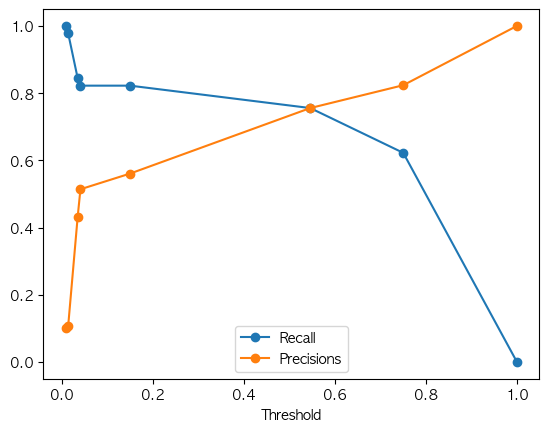

In [50]:
prc_df.set_index('Threshold').plot(marker='o')
plt.show()

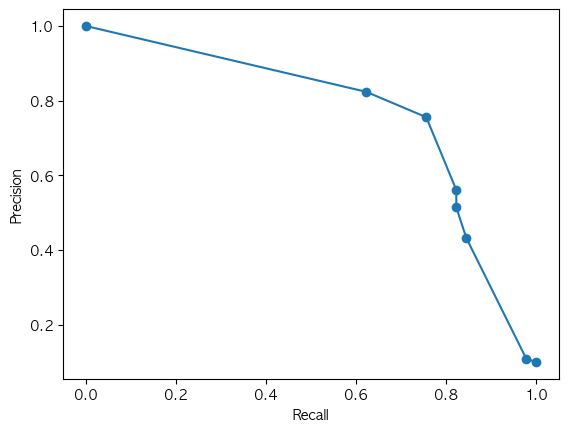

In [51]:
plt.plot(prc_df['Recall'], prc_df['Precisions'], marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [52]:
# PR Curve(Precision Recall Curve)

### 임계값 변경 후처리를 통한 recall/precision 변경 

In [53]:
prc_df

,Threshold,Recall,Precisions
0,0.008264,1.000000,0.100000
1,0.013043,0.977778,0.107579
2,0.033898,0.844444,0.431818
3,0.040000,0.822222,0.513889
4,0.149254,0.822222,0.560606
5,0.545455,0.755556,0.755556
6,0.750000,0.622222,0.823529
7,1.000000,0.000000,1.000000


##### 모델 예측 결과에 적용

In [54]:
# test set -> 모델 양성 확률출론데 대해 임계값을 변경했을때 recall, precision 계산
pos_test_tree = tree.predict_proba(X_test)[:, 1]
# pos_test_rfc = rfc.predict_proba(X_test)[:, 1]

pred_test_tree = np.where(pos_test_tree > 0.1, 1, 0)  # 양성,음성의 임계값을 0.1로 지정 / 0.1이 넘으면 1로 할거야.
print_metrics_classification(y_test, pred_test_tree, title='Threshold: 0.1')

Threshold: 0.1
정확도(accuracy): 0.9177777777777778
재현율/민감도(recall):  0.8222222222222222
정밀도(precision):  0.5606060606060606
f1-score:  0.6666666666666666


In [55]:
pred_test_tree = np.where(pos_test_tree > 0.5, 1, 0)   # 양성,음성의 임계값을 0.5로 지정/ 0.5이 넘으면 1로 할거야.
print_metrics_classification(y_test, pred_test_tree, title='Threshold: 0.5')

Threshold: 0.5
정확도(accuracy): 0.9511111111111111
재현율/민감도(recall):  0.7555555555555555
정밀도(precision):  0.7555555555555555
f1-score:  0.7555555555555555


In [56]:
pred_test_tree = np.where(pos_test_tree > 0.6, 1, 0)   # 양성,음성의 임계값을 0.6로 지정/ 0.6이 넘으면 1로 할거야.
print_metrics_classification(y_test, pred_test_tree, title='Threshold: 0.6')

Threshold: 0.6
정확도(accuracy): 0.9488888888888889
재현율/민감도(recall):  0.6222222222222222
정밀도(precision):  0.8235294117647058
f1-score:  0.7088607594936709


## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 </br>AP Score(Average Precision Score)
- Positive 확률 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
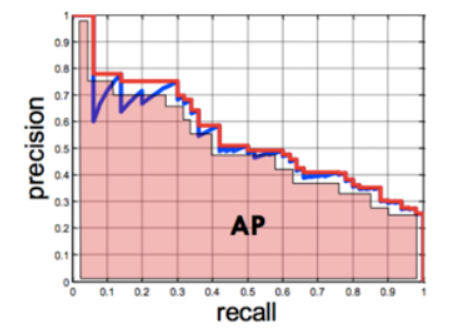   

In [57]:
# AP score : precicsion 라인 아래 면적에 대한 넓이를 재는 값.

0.6766948888666132


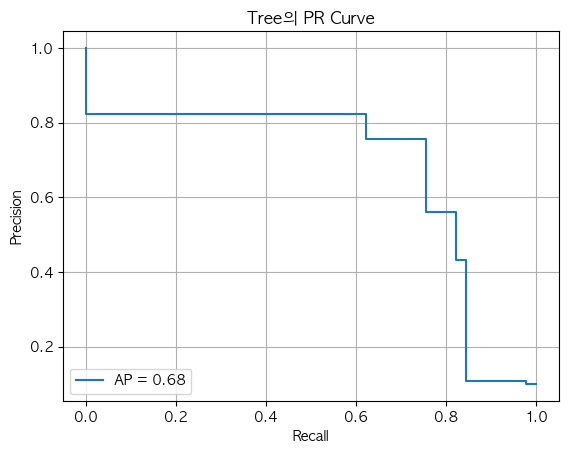

In [58]:
from sklearn.metrics import PrecisionRecallDisplay #, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt

# Positive 확률을 뽑아내야 함.
test_proba_tree =  tree.predict_proba(X_test)[:,1] # 음성과 양성이 나옴->우린 양성이 필요해서 1번축만 갖고온다(양성확률)
test_proba_rfc =  rfc.predict_proba(X_test)[:,1]

ap_score_tree = average_precision_score(y_test, test_proba_tree) #(y, 양성확률)
print(ap_score_tree)

precision1, recalls1, threshs1 = precision_recall_curve(y_test, test_proba_tree)
disp_tree = PrecisionRecallDisplay(precision1, recalls1, 
                                   average_precision=ap_score_tree) #ap score값 대입->왼쪽아래 legend 만들어줌
disp_tree.plot()
plt.grid()
plt.title('Tree의 PR Curve')
plt.show()

0.8775487970449387


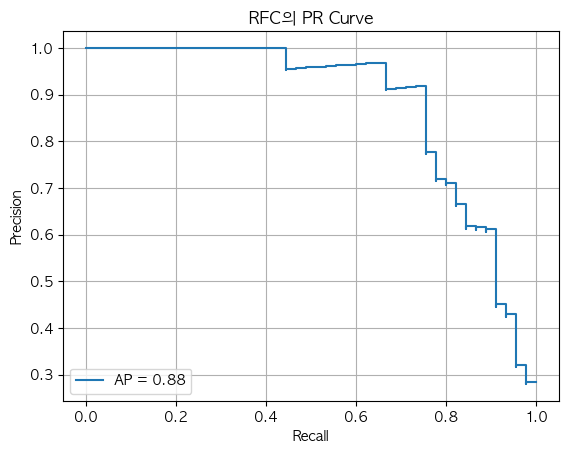

In [59]:
# rfc test set에 대한 PR Curve.   11:10분까지./
test_proba_rfc =  rfc.predict_proba(X_test)[:,1]  #양성 확률의 값

ap_score_rfc = average_precision_score(y_test, test_proba_rfc) #(y, 양성확률)
print(ap_score_rfc)

#precision, recall 점수들을 조회
precision2, recalls2, threshs2 = precision_recall_curve(y_test, test_proba_rfc)
disp_rfc = PrecisionRecallDisplay(precision2, recalls2, 
                                   average_precision=ap_score_rfc) #ap score값 대입->왼쪽아래 legend 만들어줌
disp_rfc.plot()
plt.grid()
plt.title('RFC의 PR Curve')
plt.show()     #위에 tree 보다는 성능이 더 잘 나왔다. 

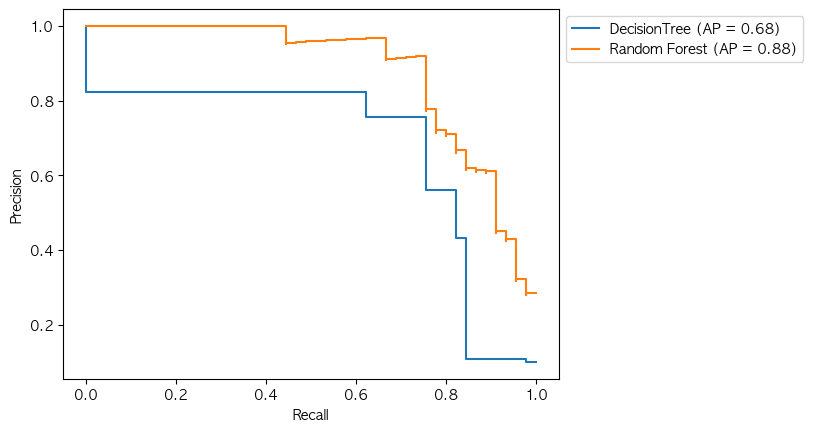

In [60]:
# 비교를 위해서 한개의  subplot에 tree.rfc의 PR Curve를 그리도록 해보자
ax = plt.gca()  # subplot(axes)를 조회.  

disp_tree = PrecisionRecallDisplay(precision1, recalls1, 
                                   average_precision=ap_score_tree, #ap score값 대입->왼쪽아래 legend 만들어줌
                                   estimator_name='DecisionTree')  # 범례에 나올 이름
disp_rfc = PrecisionRecallDisplay(precision2, recalls2, 
                                   average_precision=ap_score_rfc, #ap score값 대입->왼쪽아래 legend 만들어줌
                                   estimator_name='Random Forest')  # 범례에 나올 이름

disp_tree.plot(ax=ax)   # ax=ax : 그래프를 그릴 subplot을 지정.
disp_rfc.plot(ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [61]:
## 그래프 보는 방법!!!!
# 맨 위에 1 값을 오래 유지하는 것이 성능이 좋은 것
# AP를 가장 많이 사용하는 것은 움직이는 사물을 찾을 때 가장 많이 사용한다. 

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)** --> 얼마나 틀렸는지에 대한 비율/ 낮을수록 좋다.
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
      </br>(재현율 & 위양성율-> '비례관계'이다)
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$

- **ROC Curve**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
    - FPR과 TPR의 변화는 비례해서 변화한다.
        - 낮은 임계값에서 큰 임계값으로 변경하면 높은 값에서 낮은 값으로 같이 변화한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

In [62]:
 # 임계점을 낮추면 -> FPR-재현율 상승....ㅠㅜㅠㅜ

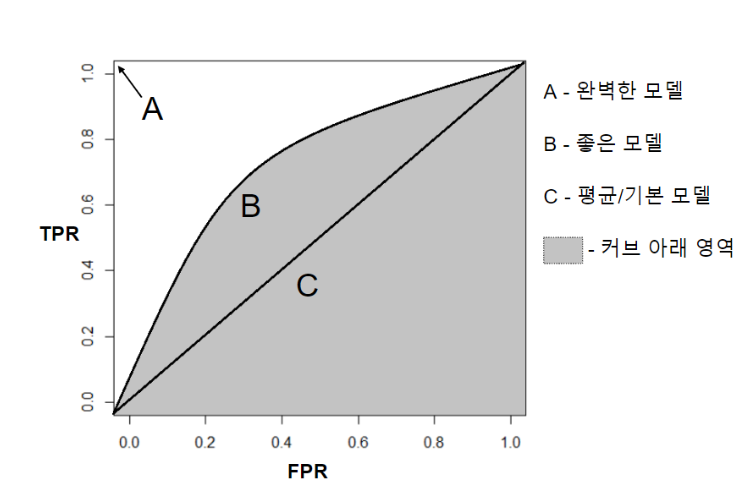

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

## ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [63]:
#ROC Curve 시각화
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

# threshold 변화에 따른 fpr과 tpr 값들을 조회 - roc_curve
fprs1, tprs1, thresh1 = roc_curve(y_test, test_proba_tree)  # (y-정답라벨, 양성예측확률)
print(fprs1.shape, tprs1.shape, thresh1.shape)

fprs2, tprs2, thresh2 = roc_curve(y_test, test_proba_rfc)  # (y-정답라벨, 양성예측확률)
print(fprs2.shape, tprs2.shape, thresh2.shape)


(8,) (8,) (8,)
(30,) (30,) (30,)


In [64]:
pd.DataFrame({'임계값': thresh1, 'FRP': fprs1, 'TRP': tprs1}) # TPR : Recall

,임계값,FRP,TRP
0,1.750000,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


In [65]:
pd.DataFrame({'임계값': thresh2, 'FRP': fprs2, 'TRP': tprs2}) # TPR : Recall

,임계값,FRP,TRP
0,1.644297,0.000000,0.000000
1,0.644297,0.000000,0.022222
2,0.453446,0.000000,0.444444
3,0.447451,0.002469,0.444444
4,0.327547,0.002469,0.666667
5,0.321028,0.007407,0.666667
6,0.282455,0.007407,0.755556
7,0.240723,0.024691,0.755556
8,0.238526,0.024691,0.777778
9,0.217295,0.034568,0.777778


0.8975308641975308


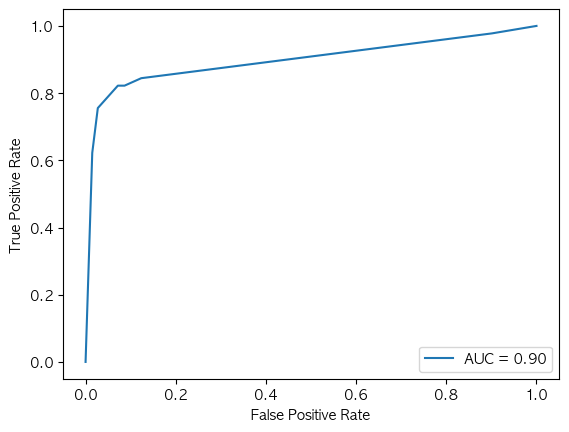

In [66]:
roc_auc_tree = roc_auc_score(y_test, test_proba_tree)
print(roc_auc_tree)

disp_roc_tree = RocCurveDisplay(fpr=fprs1, tpr=tprs1,
                                roc_auc=roc_auc_tree)
disp_roc_tree.plot()
plt.show()

0.9742661179698217


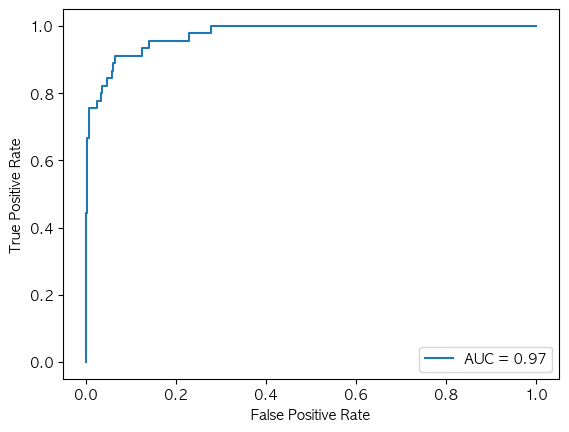

In [67]:
roc_auc_rfc = roc_auc_score(y_test, test_proba_rfc)
print(roc_auc_rfc)

disp_roc_rfc = RocCurveDisplay(fpr=fprs2, tpr=tprs2,
                                roc_auc=roc_auc_rfc)
disp_roc_rfc.plot()
plt.show()

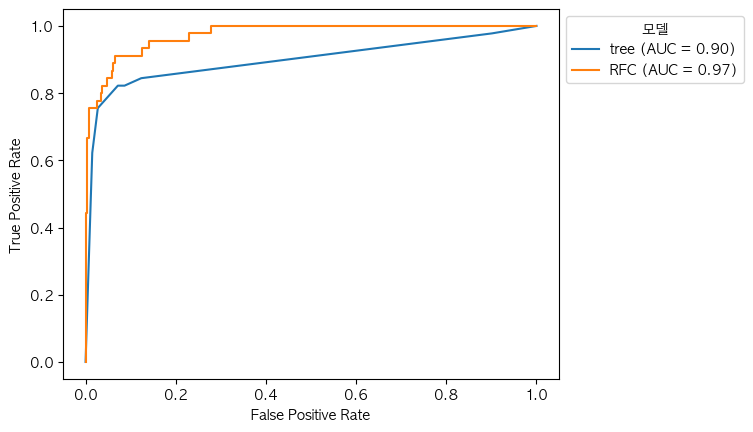

In [68]:
# tree, rfc 커브를 하나의 subplot(axes)에 그리기.
ax = plt.gca()  # subplot(axes)를 조회.  

disp_roc_tree2 = RocCurveDisplay(fpr=fprs1, tpr=tprs1,
                                roc_auc=roc_auc_tree, estimator_name='tree')

disp_roc_rfc2 = RocCurveDisplay(fpr=fprs2, tpr=tprs2,
                                roc_auc=roc_auc_rfc,estimator_name='RFC')

disp_roc_tree2.plot(ax=ax)   # ax=ax : 그래프를 그릴 subplot을 지정.
disp_roc_rfc2.plot(ax=ax)

plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='모델')
plt.show()


# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [69]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay, 
                             precision_recall_curve, PrecisionRecallDisplay, average_precision_score, 
                             roc_curve, RocCurveDisplay, roc_auc_score)

import matplotlib.pyplot as plt 

In [70]:
# 데이터 로딩  ####### 선생님 것 보면서 처음부터 다시 쳐보기 ########
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Train/Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((455, 30), (455,), (114, 30), (114,))

In [71]:
# 모델링
## 모델 생성/학습
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rfc = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [72]:
# 평가 - test set
test_pred_tree = tree.predict(X_test)
test_pred_proba_tree = tree.predict_proba(X_test)[:, 1]

test_pred_rfc = rfc.predict(X_test)
test_pred_proba_rfc = rfc.predict_proba(X_test)[:, 1]

In [73]:
# Tree 모델에대한 평가
print('정확도:', accuracy_score(y_test, test_pred_tree))
print('recall:', recall_score(y_test, test_pred_tree))
print('precision:', precision_score(y_test, test_pred_tree))
print('f1 score:', f1_score(y_test, test_pred_tree))
ap_tree = average_precision_score(y_test, test_pred_proba_tree)
roc_auc_tree = roc_auc_score(y_test, test_pred_proba_tree)
print('AP Score:', ap_tree)
print("roc-auc:", roc_auc_tree)

정확도: 0.9210526315789473
recall: 0.9305555555555556
precision: 0.9436619718309859
f1 score: 0.9370629370629372
AP Score: 0.9508563971094506
roc-auc: 0.9446097883597883


In [74]:
cm = confusion_matrix(y_test, test_pred_tree)
cm

array([[38,  4],
       [ 5, 67]])

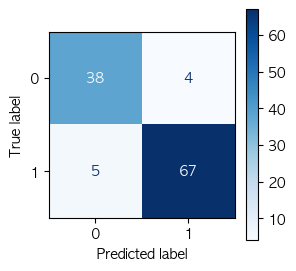

In [75]:
plt.figure(figsize=(3,3))
ax = plt.gca()
ConfusionMatrixDisplay(cm).plot(cmap='Blues', ax=ax)
plt.show()

In [76]:
# RandomForest 
print('정확도:', accuracy_score(y_test, test_pred_rfc))
print('Recall:', recall_score(y_test, test_pred_rfc))
print('Precision:', precision_score(y_test, test_pred_rfc))
print('f1_score:', f1_score(y_test, test_pred_rfc))
ap_rfc = average_precision_score(y_test, test_pred_proba_rfc)
roc_auc_rfc = roc_auc_score(y_test, test_pred_proba_rfc)
print('AP Score:', ap_rfc)
print('roc auc:', roc_auc_rfc)

정확도: 0.9385964912280702
Recall: 0.9444444444444444
Precision: 0.9577464788732394
f1_score: 0.951048951048951
AP Score: 0.977122126791544
roc auc: 0.9718915343915344


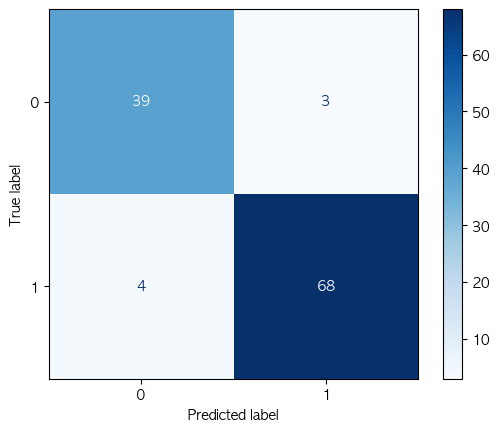

In [77]:
cm2 = confusion_matrix(y_test, test_pred_rfc)
ConfusionMatrixDisplay(cm2).plot(cmap='Blues')
plt.show()

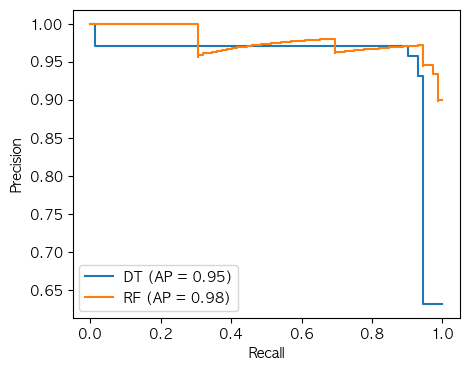

In [78]:
# precision recall curve
precisions1, recalls1, _ = precision_recall_curve(y_test, test_pred_proba_tree) # Tree
precisions2, recalls2, _ = precision_recall_curve(y_test, test_pred_proba_rfc)  # RF

plt.figure(figsize=(5,4))
ax = plt.gca()
PrecisionRecallDisplay(precisions1, recalls1, 
                       average_precision=ap_tree, estimator_name='DT').plot(ax=ax)
PrecisionRecallDisplay(precisions2, recalls2, 
                       average_precision=ap_rfc, estimator_name='RF').plot(ax=ax)
plt.show()

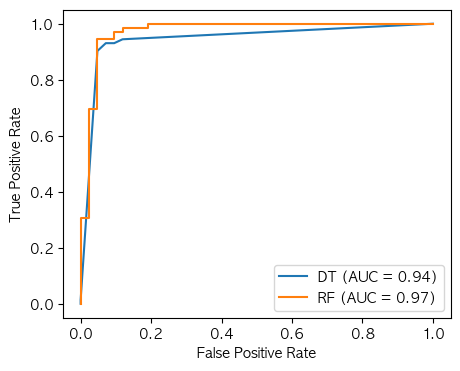

In [79]:
fprs1, tprs1, _ = roc_curve(y_test, test_pred_proba_tree)  #Tree
fprs2, tprs2, _ = roc_curve(y_test, test_pred_proba_rfc)   #RF
plt.figure(figsize=(5,4))
ax = plt.gca()
RocCurveDisplay(fpr=fprs1, tpr=tprs1, roc_auc=roc_auc_tree, estimator_name='DT').plot(ax=ax)
RocCurveDisplay(fpr=fprs2, tpr=tprs2, roc_auc=roc_auc_rfc, estimator_name='RF').plot(ax=ax)
plt.show()